In [1]:
import json
import pandas as pd
import plotly.express as px

# --- Load JSON output ---
with open("pdf_image_analysis.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Create DataFrame from valid files
df = pd.DataFrame(data["valid_files"])

# Quick sanity check
df.head()


,filename,relative_path,pages,images,images_per_page
0,012a026f-6904-4559-8b74-c76495d5f255_1.pdf,2015/06/01/012a026f-6904-4559-8b74-c76495d5f25...,1,0,0.0
1,0713f7fa-9f13-46e9-b553-1a00caa22304_1.pdf,2015/06/01/0713f7fa-9f13-46e9-b553-1a00caa2230...,2,2,1.0
2,29287588-d233-4a3c-a78d-fcdad26e30d4_1.pdf,2015/06/01/29287588-d233-4a3c-a78d-fcdad26e30d...,2,2,1.0
3,6019b489-18b0-4ddc-91cc-7ef02efe1efb_1.pdf,2015/06/01/6019b489-18b0-4ddc-91cc-7ef02efe1ef...,1,1,1.0
4,5680f67f-bdb2-4cf0-9b2b-450603aa538d_2.pdf,2015/06/01/5680f67f-bdb2-4cf0-9b2b-450603aa538...,1,2,2.0


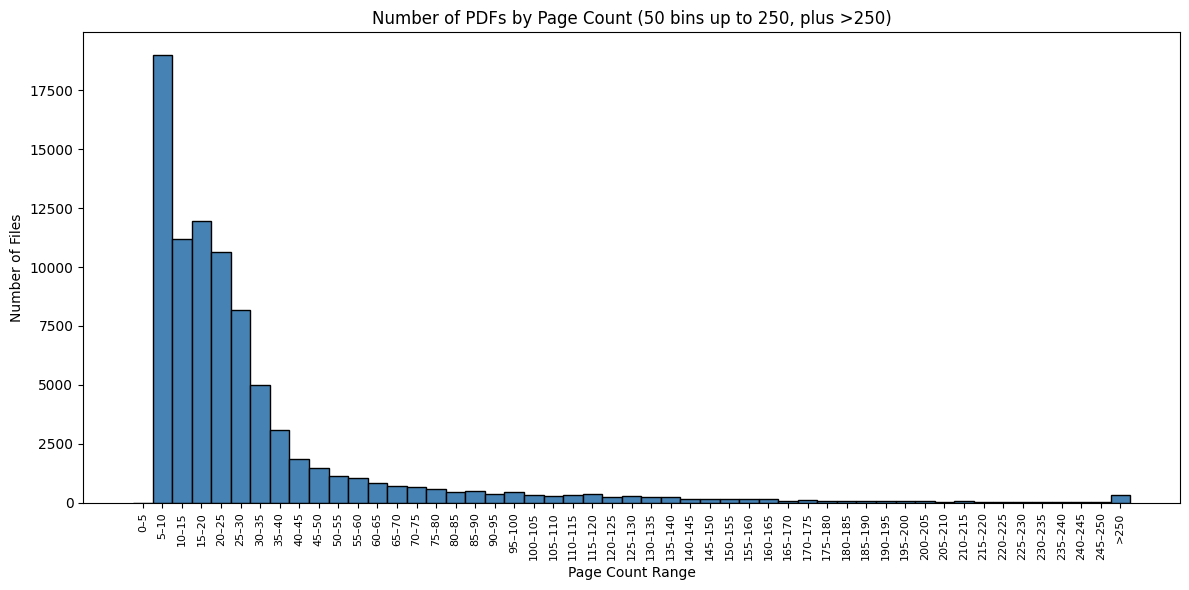

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# --- Load data ---
json_path = Path("pdf_image_analysis.json")
if not json_path.exists():
    raise FileNotFoundError(f"Can't find: {json_path.resolve()}")

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data.get("valid_files", []))
if df.empty or "pages" not in df.columns:
    raise ValueError("No valid files or 'pages' field missing in JSON.")
df = df[df["pages"] > 5]

# --- Define bins ---
# 50 bins between 0 and 250, plus one overflow bin for >250 pages
num_bins = 50
bins = np.linspace(0, 250, num_bins + 1)
bins = np.append(bins, float("inf"))  # add overflow bin

# --- Assign each PDF to a bin ---
df["page_bin"] = pd.cut(df["pages"], bins=bins, include_lowest=True)

# Combine the last bin label into ">250"
bin_labels = []
for i, interval in enumerate(df["page_bin"].cat.categories):
    if np.isinf(interval.right):
        label = ">250"
    else:
        label = f"{int(interval.left)}–{int(interval.right)}"
    bin_labels.append(label)

# Apply labels to DataFrame and count
df["page_bin"] = pd.Categorical(df["page_bin"], categories=df["page_bin"].cat.categories, ordered=True)
bin_counts = df["page_bin"].value_counts().sort_index()
x_labels = bin_labels
y_counts = bin_counts.values

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.bar(x_labels, y_counts, width=1.0, color="steelblue", edgecolor="black")

plt.title("Number of PDFs by Page Count (50 bins up to 250, plus >250)")
plt.xlabel("Page Count Range")
plt.ylabel("Number of Files")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


In [5]:


# Load your analysis JSON
with open("pdf_image_analysis.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data.get("valid_files", []))

# Check if we have any valid PDFs
if df.empty:
    print("No valid PDFs found.")
else:
    # Find the file with the maximum page count
    max_row = df.loc[df["pages"].idxmax()]
    print("📄 File with the most pages:")
    print(f"Filename:      {max_row['filename']}")
    print(f"Relative path: {max_row['relative_path']}")
    print(f"Pages:         {max_row['pages']}")
    print(f"Images:        {max_row['images']}")
    print(f"Images/page:   {max_row['images_per_page']}")


📄 File with the most pages:
Filename:      f2595b79-73e7-57aa-b314-361590c05e83_1.pdf
Relative path: 2021/09/27/f2595b79-73e7-57aa-b314-361590c05e83_1.pdf
Pages:         3949
Images:        38547
Images/page:   9.76
